In [2]:
import sunpy

In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
import matplotlib.cm as cmx
from sunpy.net import hek
import sunpy
import sunpy.map
import sunpy.roi
from sunpy.time import *
import shapely
from shapely.wkt import dumps, loads
import os
import datetime

In [4]:
def SetupSunPlot():
    plt.grid(True)
    plt.ylabel('ycoord (arcsec)',fontsize=18)
    plt.xlabel('xcoord (arcsec)',fontsize=18)
    plt.axis([-1500, 1500, -1500, 1500])
    Circle1 = plt.Circle((0,0), radius=1000, linestyle='solid', linewidth=2, fill=False)
    fig1 = plt.gcf()
    fig1.gca().add_artist(Circle1)
    ax = fig1.add_subplot(111)
    ax.set_aspect('equal')
    ax.tick_params(axis='both', which='major', labelsize=14)
    fig1.set_size_inches(10.5,10.5)

In [5]:
def PlotPolygon(polygon,color):
    polygon1=plt.Polygon(loads(polygon).exterior,color=color,linewidth=0.5,fill=None)
    fig1 = plt.gcf()
    fig1.gca().add_artist(polygon1)

In [57]:
def SetupColorMap(ColorMapName,min,max):
    #set up color table
    cm = plt.get_cmap(ColorMapName) 
    cNorm  = colors.Normalize(vmin=min, vmax=max)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    return scalarMap

In [13]:
#variables and files
tstart = '2012/01/01 00:00:00'
tend = '2012/01/31 23:59:59'
DateStr = '2012'
FilamentTracksFile = 'FIDustinTracked_2012_Jan.txt'

#tstart = '2012/01/01 00:00:00'
#tend = '2012/12/31 23:59:59'
#DateStr = '2012'
#FilamentTracksFile = '/storage/kreeves/Projects/REU/reu2015/FIDustinTracked_2012.txt'
DateFile = DateStr.replace("/","_")

In [8]:
# Query HEK for eruptions in October 2013
event_type = 'FE'
client = hek.HEKClient()
eruptions = client.search(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))

POLYGON((-737 298,-253 298,-253 777,-737 777,-737 298))
POINT(-495 537)
yay!


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


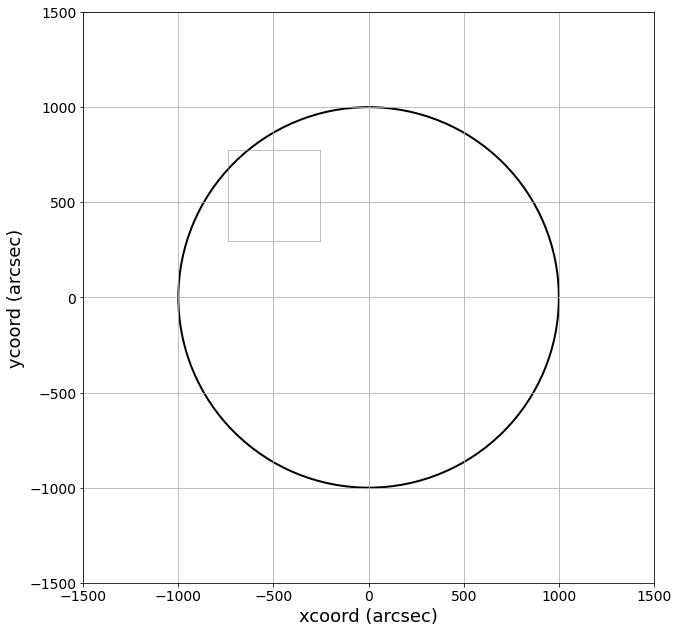

In [9]:
FE_poly = [elem["hpc_bbox"] for elem in eruptions] 
a = FE_poly[0]
print(a)
#set up plot
SetupSunPlot()
#plot bounding box
PlotPolygon(a,'gray')
FE_coords = [elem["hpc_coord"] for elem in eruptions] 
print(FE_coords[0])
FE_poly_obj = loads(a)
FE_point_obj = loads(FE_coords[0])
if FE_poly_obj.contains(FE_point_obj):
    print("yay!")

In [10]:
#code from Ashna, filters out unique eruptions
times=[elem["event_starttime"] for elem in eruptions] 
result=[]
indices=[]
### the following loop will remove identical eruptions that have been recorded at different wavelengths by sorting with time
for element in times:
    if element not in result:
        indices.append((times.index(element)))
        result.append(element)
filtered_eruptions=[eruptions[i] for i in indices] #creates a filtered list of objects that are not indentical
FE_poly = [elem["hpc_bbox"] for elem in filtered_eruptions] 
print(len(filtered_eruptions))

238


238


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


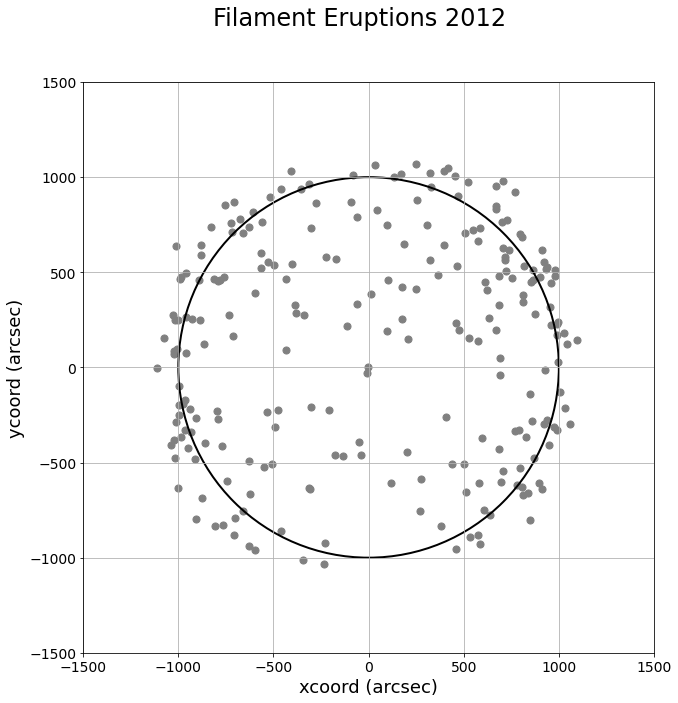

In [11]:
# make a scatter plot of locations of filament eruptions
longitude = [elem["hpc_x"] for elem in filtered_eruptions] 
latitude = [elem["hpc_y"] for elem in filtered_eruptions] 
plt.scatter(longitude,latitude,color='gray',s=50)
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Filament Eruptions '+DateStr,fontsize=24)
print(len(longitude))

In [14]:
#get filament data from HEK
event_type = 'FI'
hek_filament = client.search(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 0.98, 'Filament length 2012')

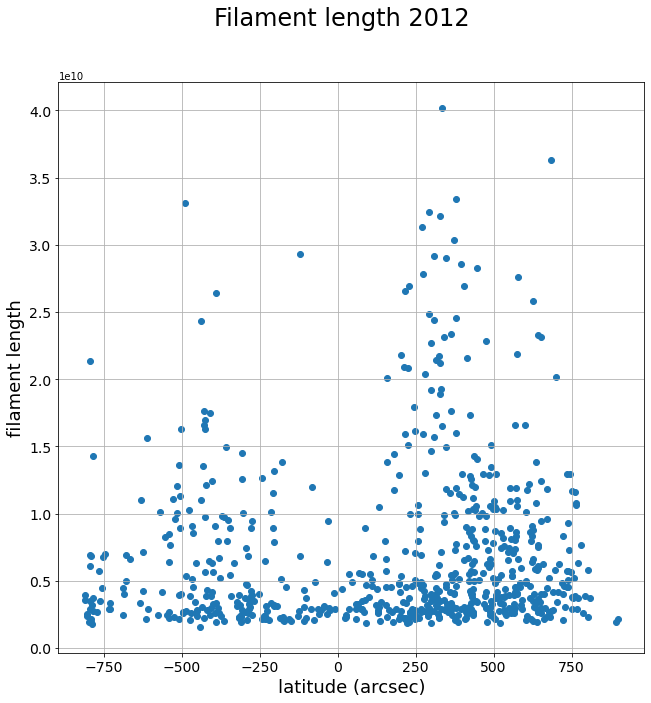

In [15]:
#plot filament length as a function of latitude
latitude = [elem["hpc_y"] for elem in hek_filament] 
length = [elem["fi_length"] for elem in hek_filament] 
plt.scatter(latitude,length)
plt.grid(True)
plt.ylabel('filament length',fontsize=18)
plt.xlabel('latitude (arcsec)',fontsize=18)
fig1 = plt.gcf()
ax = fig1.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)
fig1.set_size_inches(10.5,10.5)
fig1.suptitle('Filament length '+DateStr,fontsize=24)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


Text(0.5, 0.98, 'Filament chirality 2012')

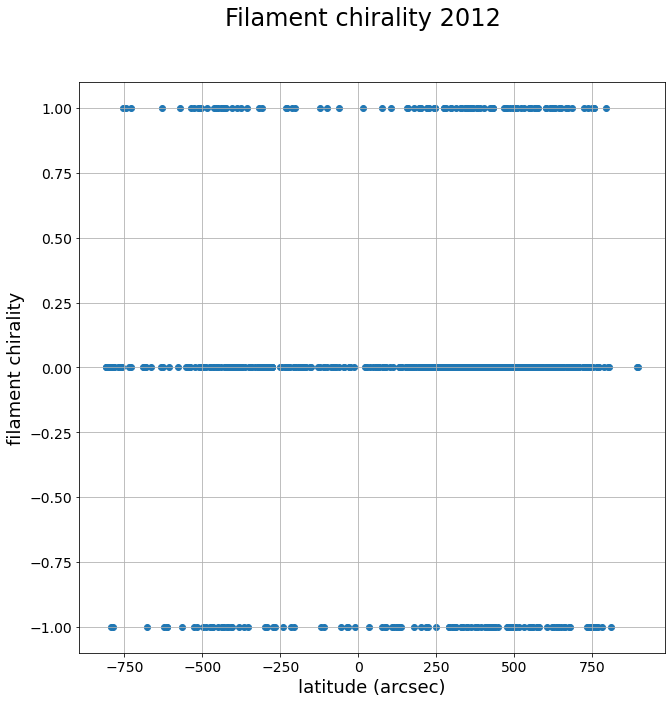

In [16]:
#plot filament chirality as a function of latitude
latitude = [elem["hpc_y"] for elem in hek_filament] 
hek_chirality = [elem["fi_chirality"] for elem in hek_filament] 
plt.scatter(latitude,hek_chirality)
plt.grid(True)
plt.ylabel('filament chirality',fontsize=18)
plt.xlabel('latitude (arcsec)',fontsize=18)
fig1 = plt.gcf()
ax = fig1.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)
fig1.set_size_inches(10.5,10.5)
fig1.suptitle('Filament chirality '+DateStr,fontsize=24)

TypeError: '<=' not supported between instances of 'int' and 'NoneType'

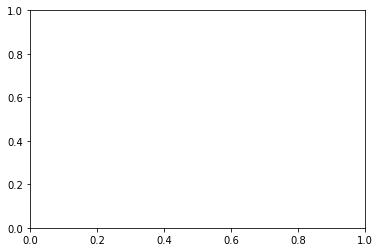

In [17]:
#plot histogram of chirality in HEK filament data
plt.hist(hek_chirality, bins=[-1.5,-0.5,0.5,1.5])
plt.title("chirality")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [18]:
#Read text file with tracked filament data from Dustin.  Delimiter is a tab (\t).
fi_tracked = pd.read_csv(FilamentTracksFile,delimiter='\t')

In [19]:
#print first few lines of tracked filament data
fi_tracked.head()

,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18
0,1,2012-01-01 08:15:04,NaN,FI,POINT(702.26001 351.130005),"POLYGON((680.125244 319.940399,733.44873 319.9...","POLYGON((694.210022 330,696.219971 332.01001,6...",POINT(49.4615746 19.1164284),"POLYGON((46.6578178 17.0551929,51.7592659 17.2...","POLYGON((48.1759834 17.7414703,48.4115486 17.8...",NaN,3300620030,cm,70.01800,0,0,0,0,NaN
1,2,2012-01-01 08:15:04,2012-01-02 08:04:55,FI,POINT(-335.032013 423.569),"POLYGON((-430.612488 377.288696,-243.477493 37...","POLYGON((-256.559998 387.350006,-253.539993 38...",POINT(-21.7999401 22.8660946),"POLYGON((-27.9167461 20.0360699,-15.319437 19....","POLYGON((-16.2346992 20.4350452,-16.0449734 20...",NaN,12771947500,cm,-6.07875,1,1,0,0,NaN
2,2,2012-01-02 08:04:55,2012-01-03 18:27:22,FI,POINT(-219.332993 427.597992),"POLYGON((-250.522644 408.48175,-186.131348 408...","POLYGON((-209.270004 418.540009,-206.25 419.54...",POINT(-14.069787 22.8834229),"POLYGON((-15.9787512 21.6737385,-11.7960272 21...","POLYGON((-13.3522606 22.2853928,-13.1621113 22...",NaN,3372370430,cm,-16.45300,0,0,0,0,NaN
3,2,2012-01-03 18:27:22,2012-01-04 08:49:18,FI,POINT(155.949005 425.589996),"POLYGON((26.1595001 361.198059,265.616486 361....","POLYGON((255.559998 371.26001,255.559998 374.2...",POINT(9.92746639 22.5396767),"POLYGON((1.61245799 18.3713264,16.6190376 18.5...","POLYGON((16.033884 19.1389103,16.0532074 19.33...",NaN,17364156400,cm,-14.10050,6,4,1,-1,NaN
4,2,2012-01-04 08:49:18,2012-01-04 18:11:55,FI,POINT(243.481995 430.621002),"POLYGON((205.249344 410.498749,280.708649 410....","POLYGON((221.350006 420.559998,224.369995 421....",POINT(15.6561918 22.8781376),"POLYGON((13.0203381 21.5327492,17.9587288 21.6...","POLYGON((14.1297235 22.1995487,14.3338509 22.2...",NaN,4018147330,cm,-1.30679,1,0,1,0,NaN


In [20]:
#print last few lines of tracked filament data
fi_tracked.tail()

,Track No.,HEK_time,next_time,Type,HPC_Center,HPC_BB_Rec,HPC_BB_Poly,HGS_Center,HGS_BB_Rec,HPC_BB_Poly.1,frm_specificid,fi_length,fi_lengthunit,fi_tilt,fi_barbstot,fi_barbsr,fi_barbsl,fi_chirality,Unnamed: 18
709,282,2012-01-31 18:42:21,NaN,FI,POINT(889.690002 -108.449997),"POLYGON((866.594543 -127.529053,908.76947 -127...","POLYGON((894.710022 -117.489998,896.719971 -11...",POINT(67.3671188 -8.71518135),"POLYGON((64.4884491 -10.1204128,70.9309616 -9....","POLYGON((68.3409042 -9.15936184,68.6344604 -9....",NaN,2009073660,cm,-28.9762,1,0,1,0,NaN
710,283,2012-02-01 19:42:32,2012-02-03 18:55:21,FI,POINT(-531.127014 -389.559998),"POLYGON((-552.211426 -418.676605,-510.042542 -...","POLYGON((-526.109985 -408.640015,-524.099976 -...",POINT(-38.1506996 -28.313261),"POLYGON((-40.7827835 -30.0300179,-37.1990471 -...","POLYGON((-38.2565498 -29.5371246,-38.0320358 -...",NaN,2870102270,cm,-77.9708,1,0,1,0,NaN
711,283,2012-02-03 18:55:21,NaN,FI,POINT(-151.563995 -368.369995),"POLYGON((-175.653503 -387.440704,-119.444504 -...","POLYGON((-140.520004 -377.399994,-137.509995 -...",POINT(-10.1389971 -28.2261944),"POLYGON((-11.9087076 -29.4060154,-8.07134056 -...","POLYGON((-9.44608498 -28.8113956,-9.2422266 -2...",NaN,3228869380,cm,-37.8604,1,0,0,0,NaN
712,284,2012-02-01 19:42:32,2012-02-03 18:55:21,FI,POINT(-218.876007 324.299011),"POLYGON((-243.976547 302.210602,-189.759445 30...","POLYGON((-233.940002 312.25,-230.919998 313.25...",POINT(-13.3143301 13.5086365),"POLYGON((-14.7941942 12.1800432,-11.4509602 12...","POLYGON((-14.206459 12.7843304,-14.0224962 12....",NaN,2798351620,cm,25.5402,0,0,0,0,NaN
713,284,2012-02-03 18:55:21,NaN,FI,POINT(377.403015 292.085999),"POLYGON((349.298309 272.011292,411.529694 272....","POLYGON((388.440002 282.049988,391.459991 283....",POINT(23.2373962 11.7375288),"POLYGON((21.3148861 10.424881,25.3762341 10.60...","POLYGON((23.9063015 11.1508036,24.1103764 11.2...",NaN,3587629570,cm,-31.4894,1,0,1,0,NaN


In [21]:
#get chirality out of tracked filaments data
chirality = fi_tracked['fi_chirality']
track_no_series = fi_tracked['Track No.']
track_no = track_no_series.values

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


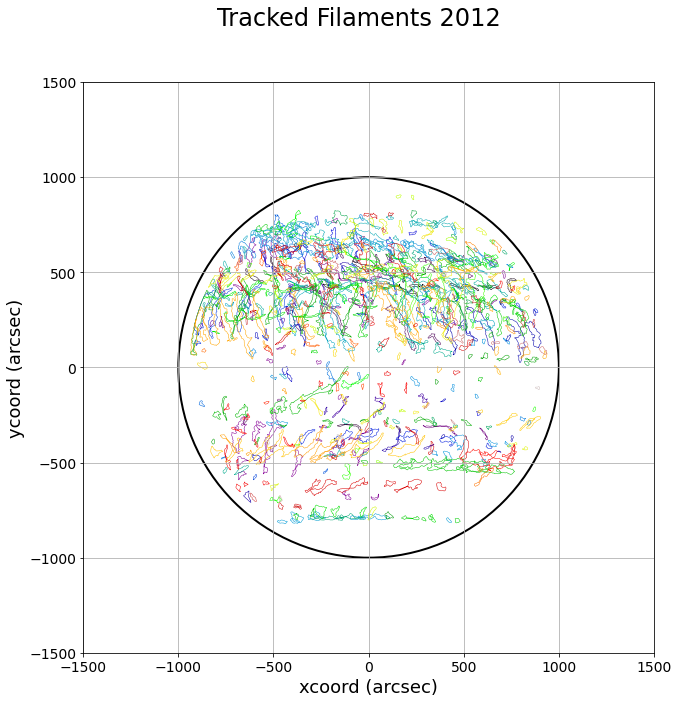

In [22]:
#plot all filament tracks
#set up plot axes and draw a circle
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Tracked Filaments ' + DateStr,fontsize=24)
#set up color table
scalarMap = SetupColorMap('nipy_spectral',0,track_no[-1])
#need an iterator
i=0
#loop through polygons
FI_track_polys = fi_tracked['HPC_BB_Poly']
for FI_polygon in FI_track_polys:
    #make filaments from the same track the same color
     colorVal = scalarMap.to_rgba(track_no[i])
    #points = [val.split(' ') for val in poly_points]     
     PlotPolygon(FI_polygon,colorVal)
     i=i+1   
fig1.savefig('filament_tracks_'+DateFile+'.png',format='png')

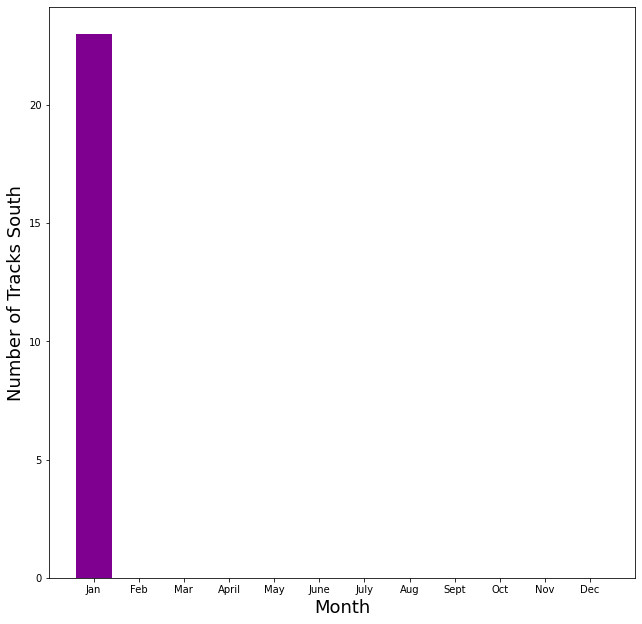

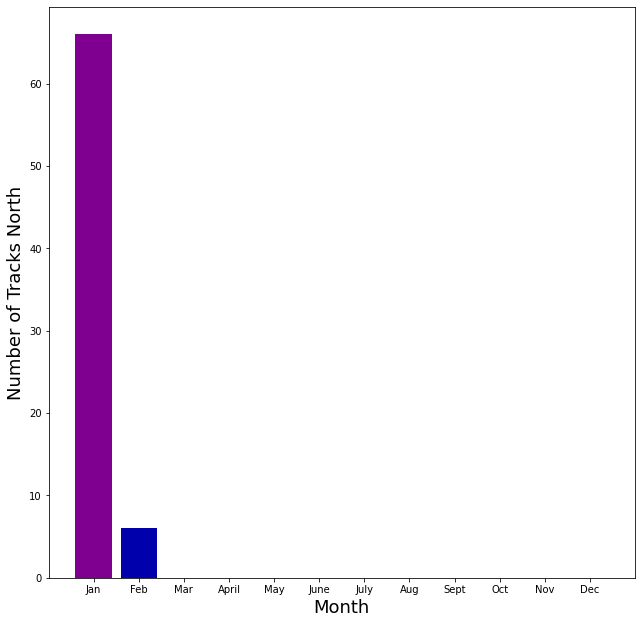

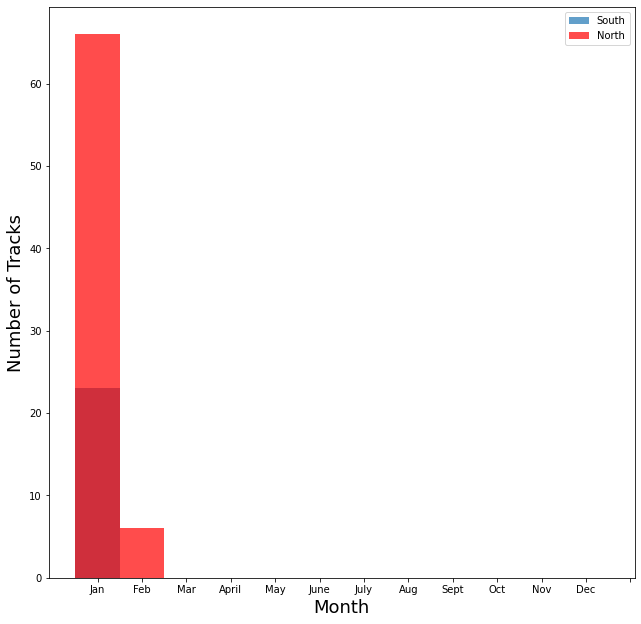

In [23]:
#fi_tracked.HEK_time = fi_tracked.HEK_time.astype("datetime64")
import dateutil
FI_track_centers = fi_tracked['HPC_Center']
xvals = [loads(elem).x for elem in fi_tracked['HPC_Center']] 
fi_tracked['xcen'] = xvals
yvals = [loads(elem).y for elem in fi_tracked['HPC_Center']] 
fi_tracked['ycen'] = yvals
fi_filtered = fi_tracked.groupby('Track No.').filter(lambda x: len(x['Track No.']) >= 3)
north_filaments = fi_filtered.groupby("Track No.").filter(lambda x: sum(x['ycen']) > 0)
yvals_north = north_filaments['HPC_Center']
south_filaments = fi_filtered.groupby("Track No.").filter(lambda x: sum(x['ycen']) <= 0)
yvals_south = south_filaments['HPC_Center']

south_time = south_filaments['HEK_time']
north_time = north_filaments['HEK_time']
south_months=[]
north_months=[]
south_groups = south_filaments.groupby("Track No.")
north_groups = north_filaments.groupby("Track No.")

for name, group in south_groups:
    month = group['HEK_time'].apply(lambda x: dateutil.parser.parse(x).strftime('%m')) 
    unique_months, counts = np.unique(month, return_counts=True)
    south_months.append(float(unique_months[np.argmax(counts)]))

for name, group in north_groups:
    month = group['HEK_time'].apply(lambda x: dateutil.parser.parse(x).strftime('%m')) 
    unique_months, counts = np.unique(month, return_counts=True)
    north_months.append(float(unique_months[np.argmax(counts)]))
cs=[]

bins_edges = np.arange(0.5,13.5)
fig, ax=plt.subplots()
bin_list = np.arange(1,14)
ticks = ['Jan','Feb', 'Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(bin_list)
ax.set_xticklabels(ticks)
hist, bins_edges = np.histogram(south_months,bins=bins_edges)
i=1
scalarMap = SetupColorMap('nipy_spectral',0,13)
for elem in hist:
    cs.append(scalarMap.to_rgba(i))
    i=i+1
plt.bar(bin_list[:-1],hist,color=cs,align='center')
fig1 = plt.gcf()
fig1.set_size_inches(10.5,10.5)
plt.ylabel('Number of Tracks South',fontsize=18)
plt.xlabel('Month',fontsize=18)
plt.show()
fig1.savefig('2012_south_filament_histogram.png',format='png')

fig, ax=plt.subplots()
ticks = ['Jan','Feb', 'Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(bin_list)
ax.set_xticklabels(ticks)
hist, bins_edges = np.histogram(north_months,bins=bins_edges)
plt.bar(bin_list[:-1],hist,color=cs,align='center')
fig1 = plt.gcf()
fig1.set_size_inches(10.5,10.5)
plt.ylabel('Number of Tracks North',fontsize=18)
plt.xlabel('Month',fontsize=18)
plt.show()
fig1.savefig('2012_north_filament_histogram.png',format='png')

fig, ax=plt.subplots()
ticks = ['Jan','Feb', 'Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(bin_list)
ax.set_xticklabels(ticks)
bar1=plt.hist(south_months,bins=bin_list, alpha=0.7,align='left',label='South')
bar2=plt.hist(north_months,bins=bin_list, alpha=0.7,align='left',color='r',label='North')
plt.legend()
fig1 = plt.gcf()
fig1.set_size_inches(10.5,10.5)
plt.ylabel('Number of Tracks',fontsize=18)
plt.xlabel('Month',fontsize=18)
plt.show()
fig1.savefig('2012_filament_histogram_overlay.png',format='png')

In [24]:
FI_centers_values = FI_track_centers.values

In [26]:
hek_time = fi_tracked['HEK_time']
print(hek_time[0])
hek_time?

2012-01-01 08:15:04


Text(0, 0.5, 'Chirality')

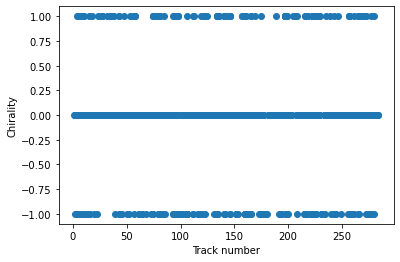

In [27]:
#plot chirality vs. track number in tracked filaments
plt.scatter(track_no_series,chirality)
plt.xlabel("Track number")
plt.ylabel("Chirality")

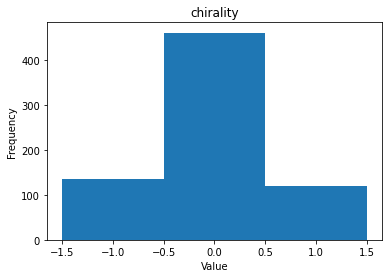

In [28]:
#make a histogram of chiralities in tracked filaments
#should be the same as chirality from HEK filaments
#since we haven't made use of the tracking yet.
plt.hist(chirality, bins=[-1.5,-0.5,0.5,1.5])
plt.title("chirality")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


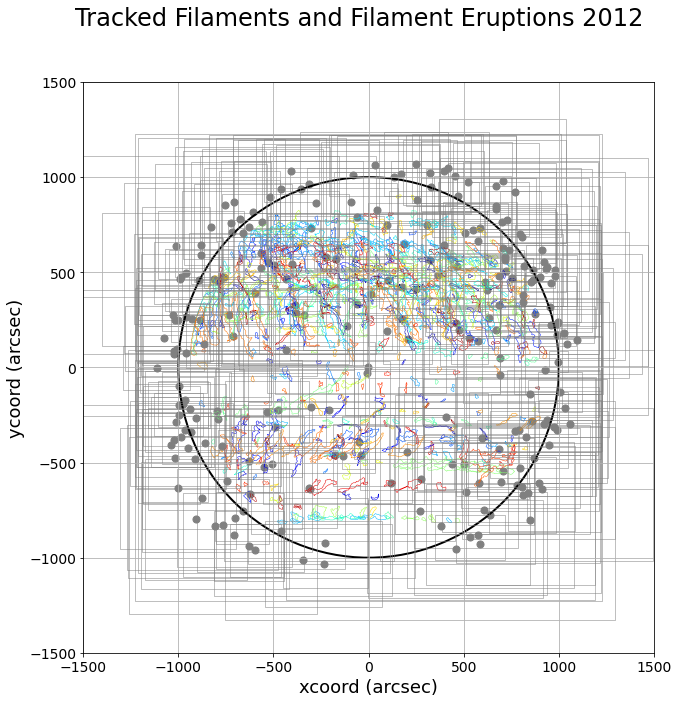

In [29]:
#put it all together
#set up plot axes and draw a circle
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Tracked Filaments and Filament Eruptions ' + DateStr,fontsize=24)
#set up color table
scalarMap = SetupColorMap('jet',0,track_no[-1])
#need an iterator
i=0
#loop through polygons
FI_track_polys = fi_tracked['HPC_BB_Poly']
for FI_polygon in FI_track_polys:
    #make filaments from the same track the same color
     colorVal = scalarMap.to_rgba(track_no[i])
    #points = [val.split(' ') for val in poly_points]     
     PlotPolygon(FI_polygon,colorVal)
     i=i+1   
#Plot all of the eruptions for October 2013
longitude = [elem["hpc_x"] for elem in filtered_eruptions] 
latitude = [elem["hpc_y"] for elem in filtered_eruptions] 
plt.scatter(longitude,latitude,color='gray',s=50)        
#get bounding boxes for eruptions
FE_polys = [elem["hpc_bbox"] for elem in filtered_eruptions] 
for FE_polygon in FE_polys:   
     PlotPolygon(FE_polygon,'gray')
fig1.savefig('filament_tracks_and_eruptions_'+DateFile+'.png',format='png')

In [31]:
#Print number of unique tracked filaments compared with HEK reported filaments
print('Number of different entries in tracked filaments file')
print(len(track_no))
print('Number of tracked filaments: ')
print(len(np.unique(track_no)))
print('')
print('Number of HEK filaments')
print(len(hek_filament))
print('') 
print('Number of HEK filament eruptions')
print(len(filtered_eruptions))

Number of different entries in tracked filaments file
714
Number of tracked filaments: 
284

Number of HEK filaments
689

Number of HEK filament eruptions
238


In [34]:
# make a scatter plot of locations of filament eruptions
track_unique = np.unique(track_no)
#colors = np.random.rand(len(latitude))
cNorm  = colors.Normalize(vmin=min(track_no), vmax=max(track_no))
longitude = [elem["hpc_x"] for elem in filtered_eruptions] 
latitude = [elem["hpc_y"] for elem in filtered_eruptions] 
print(colors)
plt.scatter(longitude,latitude,c=colors,s=50)
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Filament Eruptions '+DateStr,fontsize=24)
print(len(longitude))

AttributeError: 'numpy.ndarray' object has no attribute 'Normalize'

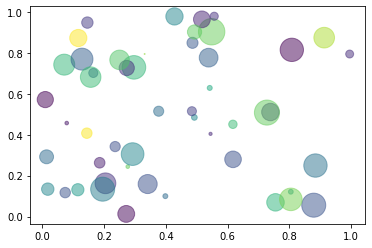

[0.26159529 0.46553316 0.34349926 0.46109323 0.65685945 0.27245118
 0.53380906 0.30376877 0.01717432 0.64307896 0.98743433 0.3518397
 0.29423756 0.76224508 0.10334617 0.27421742 0.17346694 0.5319575
 0.00533822 0.14802259 0.34426054 0.25009505 0.16552924 0.75600921
 0.41494926 0.67494818 0.86542917 0.98303398 0.25432278 0.06403649
 0.75632628 0.78513359 0.83359987 0.65430985 0.1175269  0.08330863
 0.60145509 0.37549767 0.23754298 0.67618143 0.18725071 0.45728231
 0.74599348 0.14130259 0.0065833  0.45992493 0.14101615 0.72027656
 0.25052694 0.12838491]


In [33]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2 # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
print(colors)

[ 0.85204819  0.50967762  0.58984034  0.18557527  0.08786719  0.74616046
  0.81270411  0.10072422  0.21920787  0.59069131  0.23810795  0.68817915
  0.76808244  0.99993506  0.99160614  0.97491344  0.63754556  0.87470502
  0.98149744  0.04265382  0.18230173  0.59948962  0.11690245  0.86660245
  0.94378696  0.59509006  0.36668119  0.36328461  0.45319738  0.80518351
  0.14091186  0.73224402  0.77563818  0.42711695  0.67127113  0.91543481
  0.73589481  0.87154318  0.77112247  0.3067833   0.74325453  0.00508567
  0.85122921  0.65113753  0.6376496   0.60460378  0.01529976  0.9850107
  0.27575516  0.52547999]


In [36]:
#get FE start and end times
fe_start_time = [elem["event_starttime"] for elem in filtered_eruptions]
fe_end_time = [elem["event_endtime"] for elem in filtered_eruptions]
fe_start_datetime=[parse_time(elem) for elem in fe_start_time]
start_time = parse_time(tstart)
end_time = parse_time(tend)
print(start_time)
print(end_time)
times=[time for time in fe_start_datetime if end_time >= time >= start_time]
time_idx = [i for i,v in enumerate(fe_start_datetime) if end_time >= v >= start_time]

2012-01-01T00:00:00.000
2012-01-31T23:59:59.000


In [37]:
#get times out of tracked filaments data
hek_time_series = fi_tracked['HEK_time']
hek_time = hek_time_series.values
next_time_series = fi_tracked['next_time']
next_time = next_time_series.values

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


AttributeError: 'numpy.ndarray' object has no attribute 'Normalize'

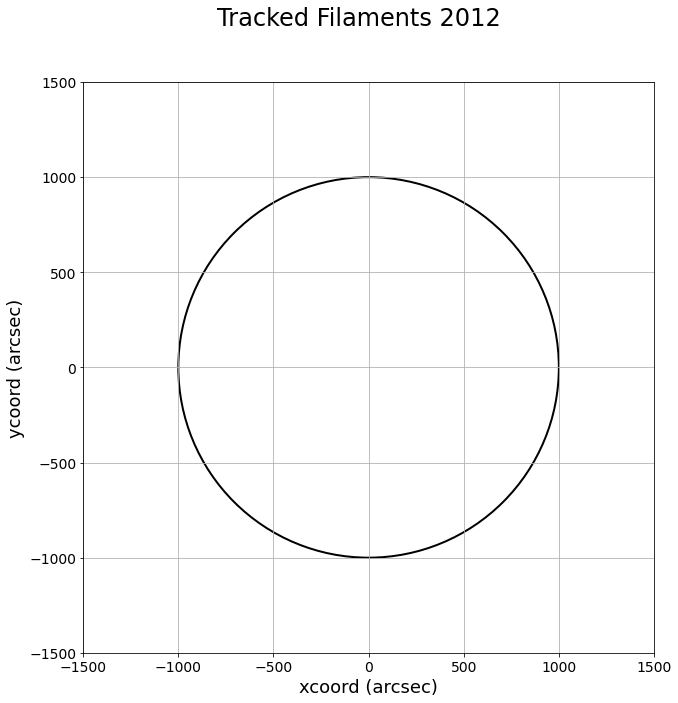

In [38]:
FI_polys = fi_tracked['HPC_BB_Poly']
# get an array of unique track numbers
track_unique = np.unique(track_no)
#loop over unique track numbers
for track_num in track_unique:
    plt.clf()
    SetupSunPlot()
    fig1 = plt.gcf()
    fig1.suptitle('Tracked Filaments '+DateStr,fontsize=24)
    #find index of arrays for track number
    track_idx = [j for j,v in enumerate(track_no) if v==track_num]
    short_FI_polys = FI_polys[track_idx[0]:track_idx[-1]+1]
    for FI_polygon in short_FI_polys:
        #set up color table for filament tracks
        scalarMap = SetupColorMap('jet',0,track_no[-1])
        #make filaments from the same track the same color
        colorVal = scalarMap.to_rgba(track_num)
        #plot filament tracks
        PlotPolygon(FI_polygon,colorVal)
    start_time = parse_time(hek_time[track_idx[0]])
    end_time = parse_time(hek_time[track_idx[-1]])
    #Text for plot
    plt.text(500,1400,'Track No. '+str(track_num))
    plt.text(500,1200,'Start Time: '+str(start_time))
    plt.text(500,1000,'End Time: '+str(end_time))
    #find eruptions in the time period
    time_idx = [j for j,v in enumerate(fe_start_datetime) if end_time >= v >= start_time]
    if len(time_idx) > 0:
        #set up color table for boxes
        scalarMap_box = SetupColorMap('Set1',0,len(time_idx))
        plt.scatter(longitude[time_idx[0]:time_idx[-1]+1],latitude[time_idx[0]:time_idx[-1]+1],color='gray',s=50)
        k = 0
        for t in time_idx:
            colorVal_box = scalarMap_box.to_rgba(k)
            label = 'Eruption time: '+str(fe_start_datetime[t])+'('+str(longitude[t])+','+str(latitude[t])+')'
            plt.text(-1400,1400-200*k,label,color=colorVal_box)
            FE_polygon = FE_poly[t]
            #plot bounding boxes  
            PlotPolygon(FE_polygon,colorVal_box)
            k=k+1
    dir = 'frames/'+DateFile+'/'
    #make directory if it doesn't exist
    if not os.path.isdir(dir):
        os.makedirs(dir)
    filename = dir+'filament_tracks_'+str(track_num)+'.png'
    fig1.savefig(filename,format='png')   
     


In [39]:
print(len(filtered_eruptions))

238


In [40]:
time1 = fe_start_datetime[0]
hek_time_datetime=[parse_time(elem) for elem in hek_time_series]
hek_time_datetime?
margin = datetime.timedelta(hours = 12)

In [42]:
FE_coords = [elem["hpc_coord"] for elem in filtered_eruptions] 
FI_poly_coords = fi_tracked['HPC_BB_Poly']
#loop over eruptions
j=0
for FE_xy in FE_coords:
    FE_point = shapely.wkt.loads(FE_xy)
    #loop over filaments
    k=0
    for FI_xy in FI_poly_coords: 
        FI_poly = shapely.wkt.loads(FI_xy)
        eruption_time = fe_start_datetime[j]
        fi_poly_time = hek_time_datetime[k]
        if FI_poly.contains(FE_point) and eruption_time - margin <= fi_poly_time <= eruption_time + margin:
            print(FE_point, hek_time[k],fe_start_time[j],track_no[k])
        k=k+1
    j=j+1

In [43]:
ypoints = np.array(latitude)
xpoints = np.array(longitude)

In [44]:
coords = [[xpoints],[ypoints]]

In [48]:
# Query HEK for CMEs in October 2013
event_type = 'ER'
client = hek.HEKClient()
cmes = client.search(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))
#cmes[0].keys

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


539


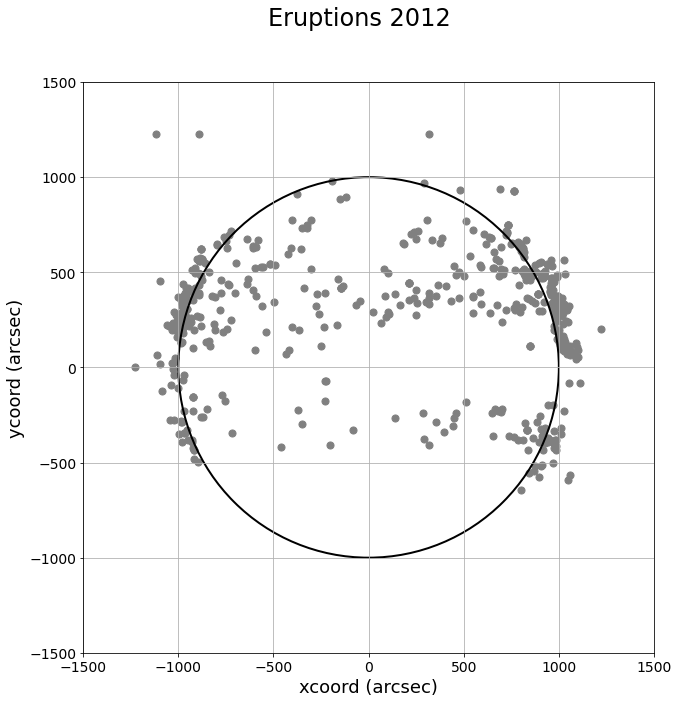

In [49]:
cme_long = [elem["hpc_x"] for elem in cmes] 
cme_lat = [elem["hpc_y"] for elem in cmes] 
plt.scatter(cme_long,cme_lat,c='gray',s=50)
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Eruptions '+DateStr,fontsize=24)
print(len(cmes))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


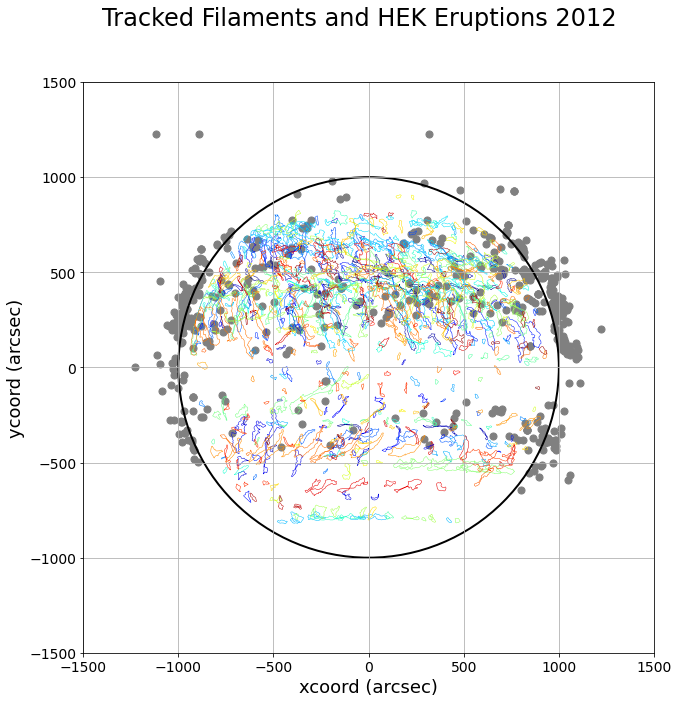

In [58]:
#put it all together
#set up plot axes and draw a circle
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Tracked Filaments and HEK Eruptions ' + DateStr,fontsize=24)
#set up color table
scalarMap = SetupColorMap('jet',0,track_no[-1])
#need an iterator
i=0
#loop through polygons
FI_track_polys = fi_tracked['HPC_BB_Poly']
for FI_polygon in FI_track_polys:
    #make filaments from the same track the same color
     colorVal = scalarMap.to_rgba(track_no[i])
    #points = [val.split(' ') for val in poly_points]     
     PlotPolygon(FI_polygon,colorVal)
     i=i+1   
#Plot all of the eruptions for October 2013
cme_long = [elem["hpc_x"] for elem in cmes] 
cme_lat = [elem["hpc_y"] for elem in cmes] 
plt.scatter(cme_long,cme_lat,c='gray',s=50)

In [59]:
#code from Ashna, filters out unique eruptions
times=[elem["event_starttime"] for elem in cmes] 
result=[]
indices=[]
### the following loop will remove identical eruptions that have been recorded at different wavelengths by sorting with time
for element in times:
    if element not in result:
        indices.append((times.index(element)))
        result.append(element)
filtered_cmes=[cmes[i] for i in indices] #creates a filtered list of objects that are not indentical
FE_poly = [elem["hpc_bbox"] for elem in filtered_cmes] 
print(len(filtered_cmes))

509


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


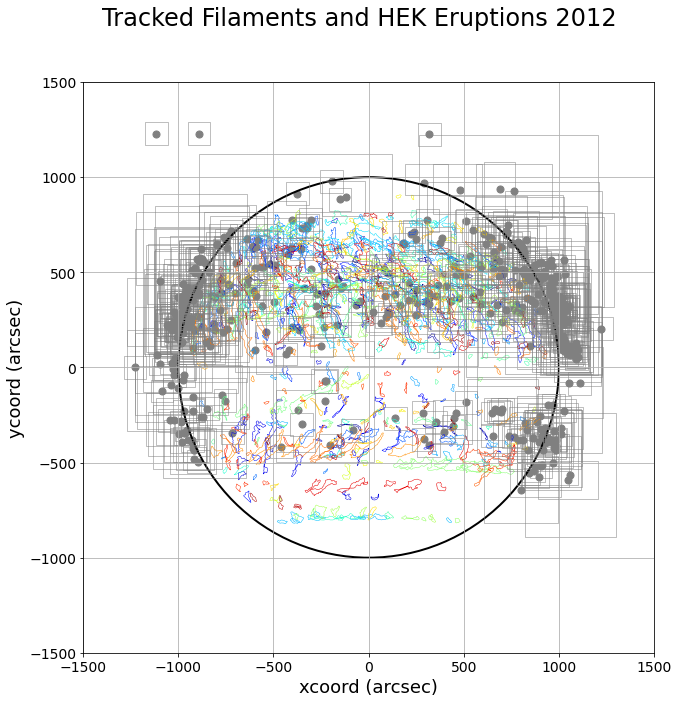

In [60]:
#put it all together
#set up plot axes and draw a circle
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Tracked Filaments and HEK Eruptions ' + DateStr,fontsize=24)
#set up color table
scalarMap = SetupColorMap('jet',0,track_no[-1])
#need an iterator
i=0
#loop through polygons
FI_track_polys = fi_tracked['HPC_BB_Poly']
for FI_polygon in FI_track_polys:
    #make filaments from the same track the same color
     colorVal = scalarMap.to_rgba(track_no[i])
    #points = [val.split(' ') for val in poly_points]     
     PlotPolygon(FI_polygon,colorVal)
     i=i+1   
#Plot all of the eruptions for October 2013
cme_long = [elem["hpc_x"] for elem in filtered_cmes] 
cme_lat = [elem["hpc_y"] for elem in filtered_cmes] 
plt.scatter(cme_long,cme_lat,c='gray',s=50)
#get bounding boxes for eruptions
FE_polys = [elem["hpc_bbox"] for elem in filtered_cmes] 
for FE_polygon in FE_polys:   
     PlotPolygon(FE_polygon,'gray')
fig1.savefig('filament_tracks_and_cmes_'+DateFile+'.png',format='png')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


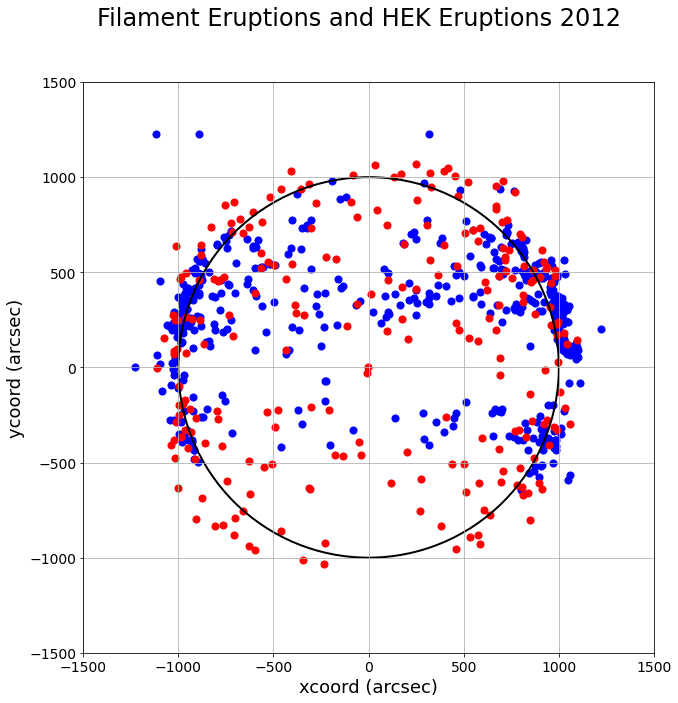

In [61]:
SetupSunPlot()
fig1 = plt.gcf()
fig1.suptitle('Filament Eruptions and HEK Eruptions ' + DateStr,fontsize=24)
plt.scatter(cme_long,cme_lat,c='blue',s=50)
plt.scatter(longitude,latitude,c='red',s=50)

In [62]:
#get FE start and end times
er_start_time = [elem["event_starttime"] for elem in filtered_cmes]
er_end_time = [elem["event_endtime"] for elem in filtered_cmes]
er_start_datetime=[parse_time(elem) for elem in er_start_time]
start_time = parse_time(tstart)
end_time = parse_time(tend)
print(start_time)
print(end_time)
times=[time for time in er_start_datetime if end_time >= time >= start_time]
time_idx = [i for i,v in enumerate(er_start_datetime) if end_time >= v >= start_time]

2010-05-01T00:00:00.000
2016-08-08T23:59:59.000


In [ ]:
FI_polys = fi_tracked['HPC_BB_Poly']
# get an array of unique track numbers
track_unique = np.unique(track_no)
#loop over unique track numbers
for track_num in track_unique:
    plt.clf()
    SetupSunPlot()
    fig1 = plt.gcf()
    fig1.suptitle('Tracked Filaments '+DateStr,fontsize=24)
    #find index of arrays for track number
    track_idx = [j for j,v in enumerate(track_no) if v==track_num]
    short_FI_polys = FI_polys[track_idx[0]:track_idx[-1]+1]
    for FI_polygon in short_FI_polys:
        #set up color table for filament tracks
        scalarMap = SetupColorMap('jet',0,track_no[-1])
        #make filaments from the same track the same color
        colorVal = scalarMap.to_rgba(track_num)
        #plot filament tracks
        PlotPolygon(FI_polygon,colorVal)
    start_time = parse_time(hek_time[track_idx[0]])
    end_time = parse_time(hek_time[track_idx[-1]])
    #Text for plot
    plt.text(500,1400,'Track No. '+str(track_num))
    plt.text(500,1200,'Start Time: '+str(start_time))
    plt.text(500,1000,'End Time: '+str(end_time))
    #find eruptions in the time period
    time_idx = [j for j,v in enumerate(er_start_datetime) if end_time >= v >= start_time]
    if len(time_idx) > 0:
        #set up color table for boxes
        scalarMap_box = SetupColorMap('Set1',0,len(time_idx))
        plt.scatter(cme_long[time_idx[0]:time_idx[-1]+1],cme_lat[time_idx[0]:time_idx[-1]+1],color='gray',s=50)
        k = 0
        for t in time_idx:
            colorVal_box = scalarMap_box.to_rgba(k)
            label = 'Eruption time: '+str(er_start_datetime[t])+'('+str(cme_long[t])+','+str(cme_lat[t])+')'
            plt.text(-1400,1400-200*k,label,color=colorVal_box)
            FE_polygon = FE_poly[t]
            #plot bounding boxes  
            PlotPolygon(FE_polygon,colorVal_box)
            k=k+1
    dir = 'frames/'+DateFile+'/'
    #make directory if it doesn't exist
    if not os.path.isdir(dir):
        os.makedirs(dir)
    filename = dir+'filament_tracks_er_'+str(track_num)+'.png'
    fig1.savefig(filename,format='png')   
     

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


In [51]:
event_type = 'FI'
tstart = '2010/05/01 00:00:00'
tend = '2016/08/08 23:59:59'
client = hek.HEKClient()
filaments = client.search(hek.attrs.Time(tstart,tend),hek.attrs.EventType(event_type))

KeyboardInterrupt: 

In [6]:
eruptions[0].keys()

NameError: name 'eruptions' is not defined

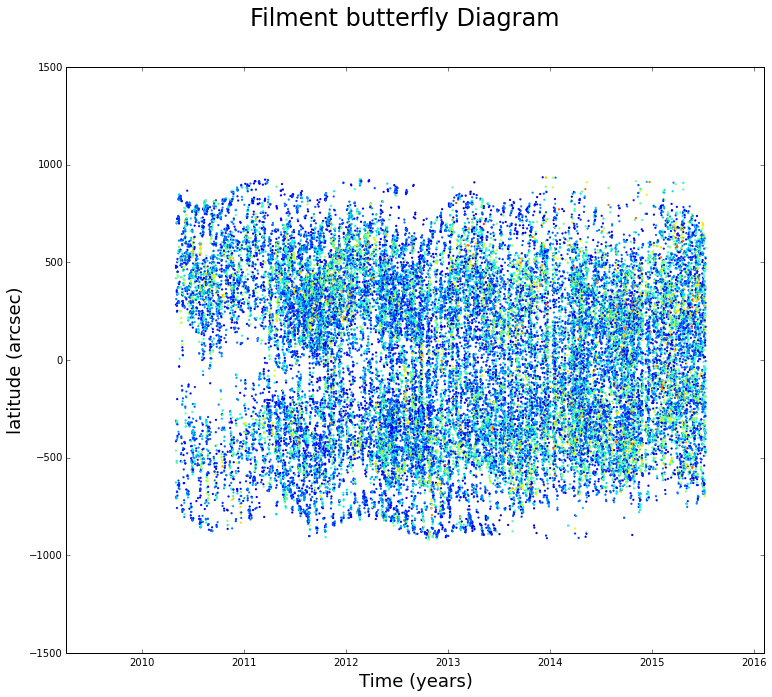

In [7]:
import matplotlib.dates as dates
import matplotlib.colors as mpcolors

date_obs = [parse_time(elem["event_starttime"]) for elem in filaments] 
latitude = [elem["hpc_y"] for elem in filaments] 
longitude = [elem["hpc_x"] for elem in filaments] 
length = [elem["fi_length"] for elem in filaments] 
for n,i in enumerate(length):
    if i == None:
        length[n] = 0
unit = [elem["fi_lengthunit"] for elem in filaments]         
for n,i in enumerate(unit):
    if i == 'arcsec':
        length[n] = length[n]*725e5    
norm_len = [float(np.log10(i))/max(np.log10(length)) for i in length]
dates = dates.date2num(date_obs)
#plt.scatter(longitude, latitude, c=norm_len)
plt.scatter(dates, latitude,c=norm_len,s=5,edgecolors='none')
plt.ylabel('latitude (arcsec)',fontsize=18)
plt.xlabel('Time (years)',fontsize=18)
ax = plt.subplot(111)
ax.xaxis_date()
plt.jet()
fig1 = plt.gcf()
fig1.set_size_inches(12.5,10.5)
fig1.suptitle('Filment butterfly Diagram',fontsize=24)
fig1.savefig('filament_butterfly_diagram.png',format='png')

[-3.44507783 -2.50936782 -2.24110695 ..., -2.37978793 -2.15664564
 -1.24457257]


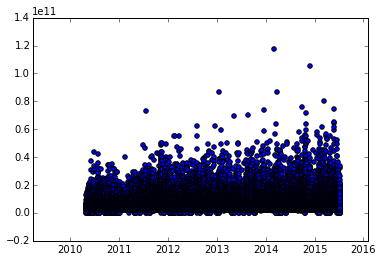

In [51]:
plt.scatter(dates, length)
ax = plt.subplot(111)
ax.xaxis_date()
fig1 = plt.gcf()
unit = [elem["fi_lengthunit"] for elem in eruptions] 
print np.log(norm_len)